In [1]:
import cv2
import numpy as np
from ball_tracking import Tracker
from matplotlib import pyplot as plt

In [15]:
cap = cv2.VideoCapture('./downstairs2_cross_court.mp4')
ret, current_frame = cap.read()
if not ret:
    raise RuntimeError("Could not read video")

corners = {"TL" : [875, 1250], "TR" : [3050, 1250], "BR" : [3700, 1720], "BL": [250, 1720]}

tracker = Tracker(focal_length_px=2880, confidence_threshold=0.8, image_size=current_frame.shape, table_points=corners)

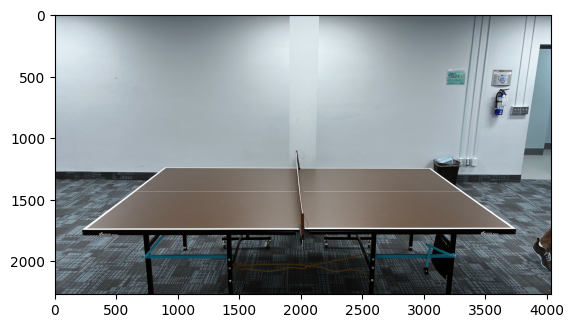

In [16]:
no_ball = cv2.imread("no_ball1.png")
front_ball = cv2.imread("front_ball1.png")
back_ball = cv2.imread("back_ball1.png")
plt.imshow(no_ball)

In [17]:

tracker.corner_calibration(no_ball, front_ball, back_ball)
print(tracker.corner_distances)
tracker.set_distances()

{'TL': 3099.0582207698894, 'TR': 3099.0582207698894, 'BL': 1961.4206672565615, 'BR': 1961.4206672565615}


In [18]:

previous_frame = current_frame.copy()

h, w = current_frame.shape[:2]
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter("diff_video.mp4", fourcc, 10, (w, h))

i = 0
heights = []
scores = []
while True:
    ret, current_frame = cap.read()
    i += 1
    print("processing frame", i, end="\r")
    if i < 0:
        continue
    if not ret or i >= 1000:
        break

    detection, score = tracker.track(current_frame)
    
    if not detection is None and score > 0.8:
        heights.append(detection[1][0])
        scores.append(score)
    
    circled_frame = tracker.write_data(current_frame, detection, score)
    video.write(circled_frame)

    previous_frame = current_frame.copy()

video.release()
cap.release()

In [19]:
# plt.imshow(tracker.preprocess(current_frame))

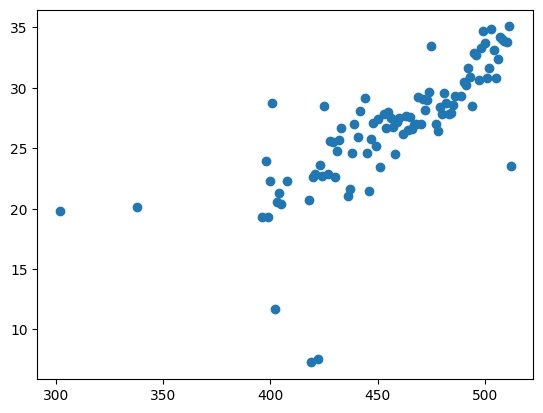

In [20]:
plt.scatter(tracker.frame_numbers, tracker.recorded_sizes)

97 211


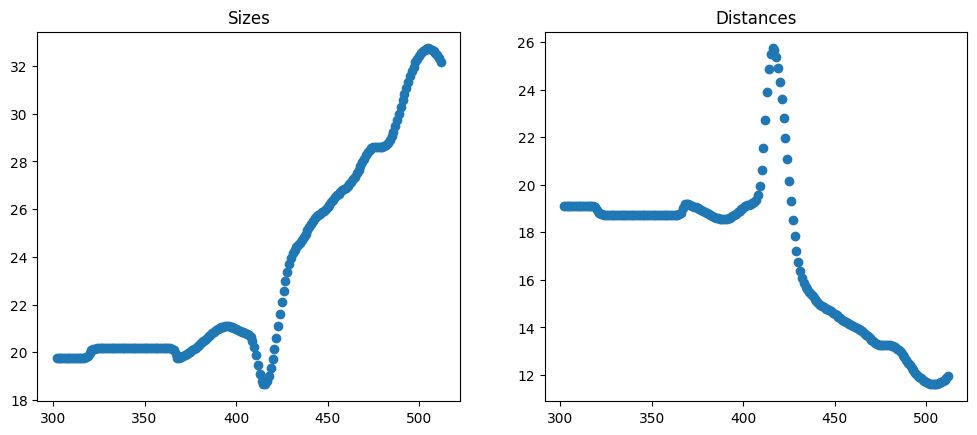

In [21]:
full_frames, smoothed_sizes, smoothed_distances = tracker.smooth_values(sigma=5)
print(len(tracker.frame_numbers), len(smoothed_sizes))

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
axes[0].scatter(full_frames, smoothed_sizes)
axes[0].set_title("Sizes")
axes[1].scatter(full_frames, smoothed_distances)
axes[1].set_title("Distances")
plt.show()

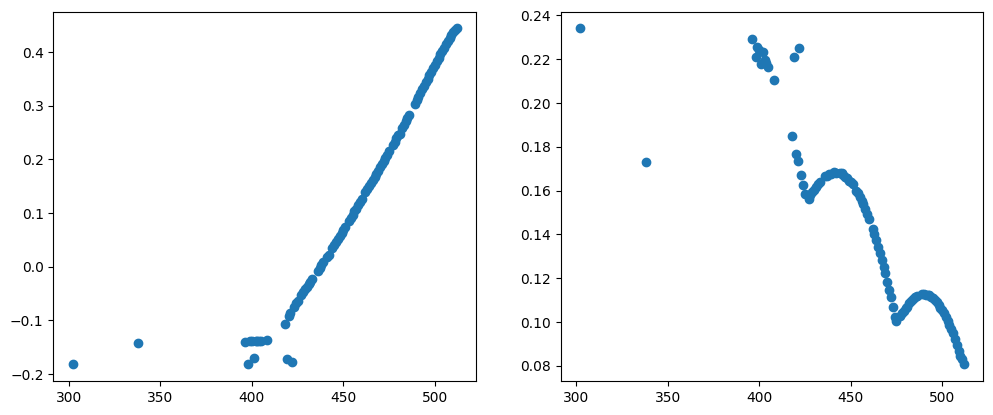

In [22]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
axes[0].scatter(tracker.frame_numbers, [angle[0] for angle in tracker.recorded_angles])
axes[1].scatter(tracker.frame_numbers, [angle[1] for angle in tracker.recorded_angles])

In [10]:
# from scatter_animation import video_scatters

xs = [p[0] for p in tracker.recorded_positions]
ys = [p[1] for p in tracker.recorded_positions]
zs = [p[2] for p in tracker.recorded_positions]

angle_x = [angle[0] for angle in tracker.recorded_angles]
angle_y = [angle[1] for angle in tracker.recorded_angles]
distances = tracker.recorded_distances
dense_indexes = list(range(len(angle_x)))

# video_scatters([[dense_indexes, xs], [dense_indexes, ys], [dense_indexes, zs], [dense_indexes, distances]], titles=["X / Z", "Angle X", "Angle Y", "Distances"], is_square=[True, False, False, False])


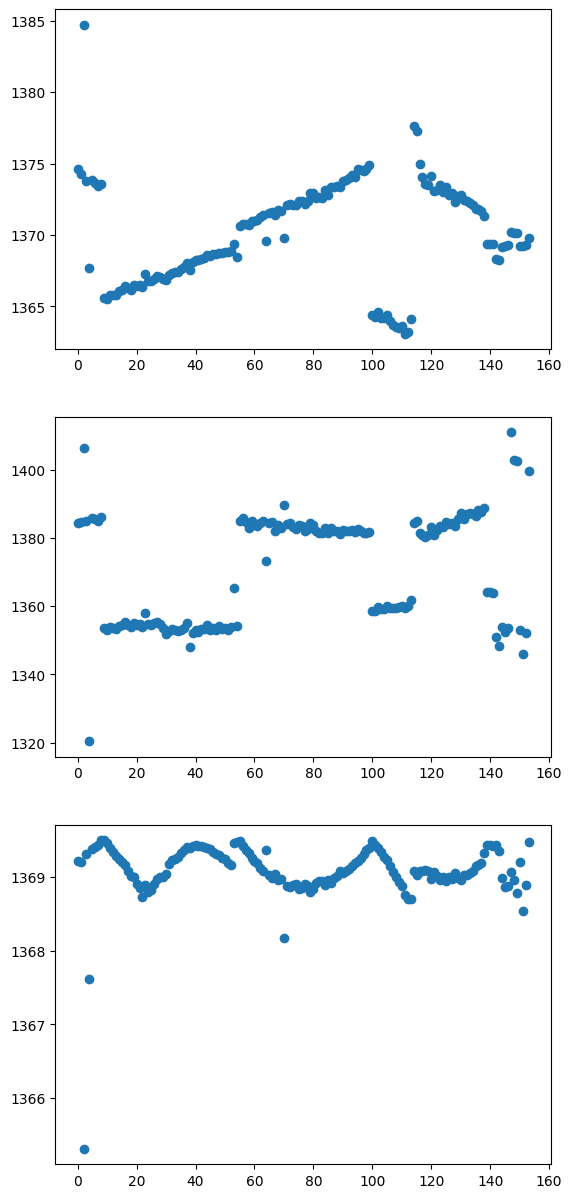

In [11]:
fig, axes = plt.subplots(3, 1)
fig.set_figheight(15)
axes[0].scatter(dense_indexes, xs)
axes[1].scatter(dense_indexes, ys)
axes[2].scatter(dense_indexes, zs)

In [12]:
# from geometry_utils import get_ground_point_full

# q = [0.591797947883606, -0.15398257970809937, -0.1981748789548874, 0.7660230398178101]

# # positions = [get_ground_point_full(dist, theta_x, theta_y, q, screen_orientation="LANDSCAPE", camera_mounting="BACK") for dist, (theta_x, theta_y) in zip(tracker.recorded_distances, tracker.recorded_angles)]
# positions = [tracker.calc_position(ax, ay + np.pi * 0.3, dist) for (ax, ay), dist in zip(tracker.recorded_angles, tracker.recorded_distances)]

In [13]:
# from bounce_detection import run_kalman
# from scipy.ndimage import median_filter

# clean_positons = median_filter(positions, 3)
# print(clean_positons)


NameError: name 'clean_positons' is not defined

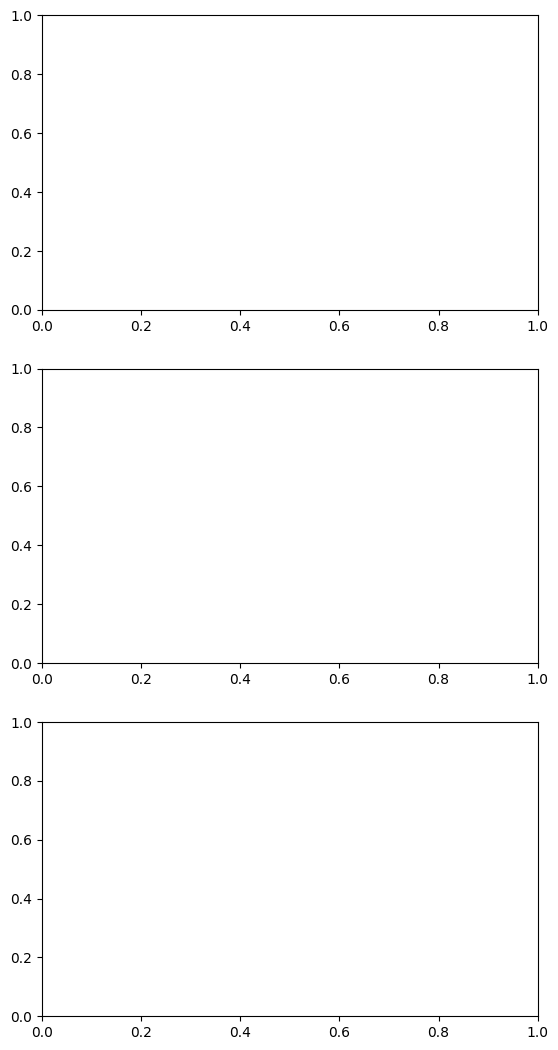

In [14]:
fig, axes = plt.subplots(3, 1)
fig.set_figheight(13)
for i in range(3):
    axes[i].scatter(dense_indexes, clean_positons[:, i])

In [ ]:
for point in positions:
    print("(" + str([float(num) for num in point])[1:-1] + ")")